In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

### Classification

In [2]:
np.random.seed(42)
# Dataset that can't be sepearted easily

X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
X.shape

(500, 2)

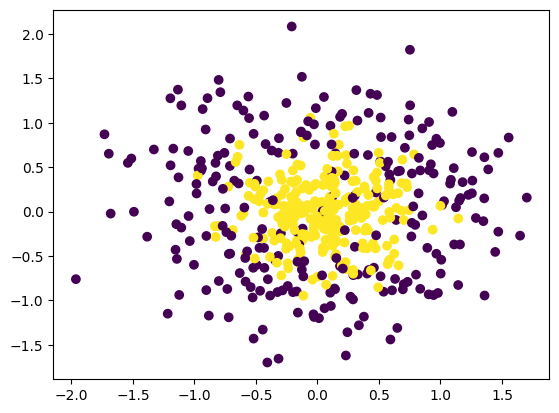

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

##### Training Single Decision Tree without any Hyperparameter

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
np.array([[4,5],[5,2]]).min()

2

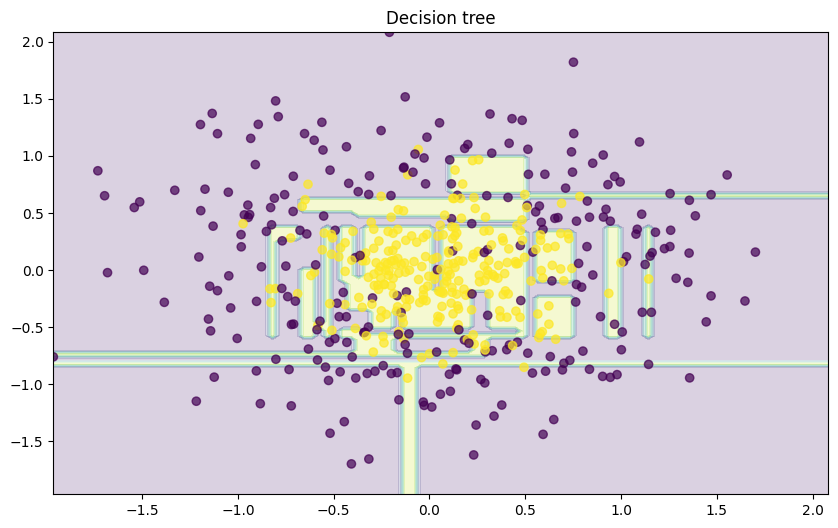

In [24]:
plt.figure(figsize=(10, 6))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

##### Applying Random Forest in above data

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Trainig 500 DT

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

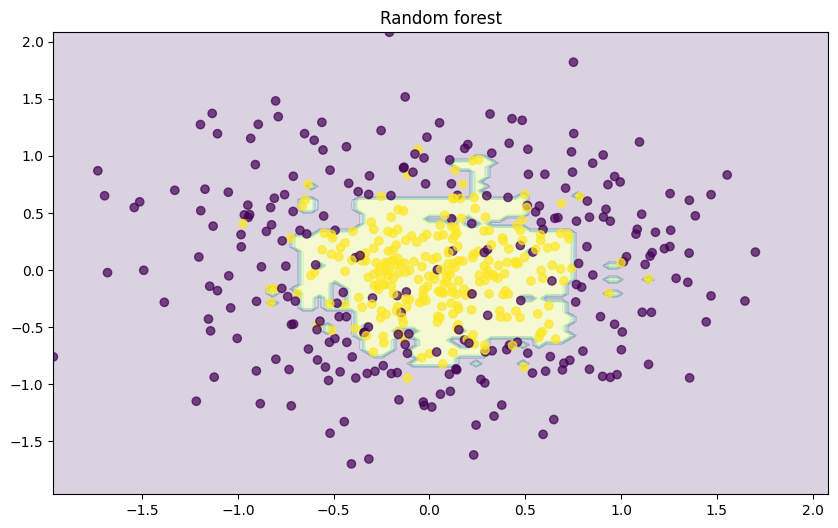

In [27]:
plt.figure(figsize=(10, 6))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

### Regression

In [35]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    # adding noise to the curve
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

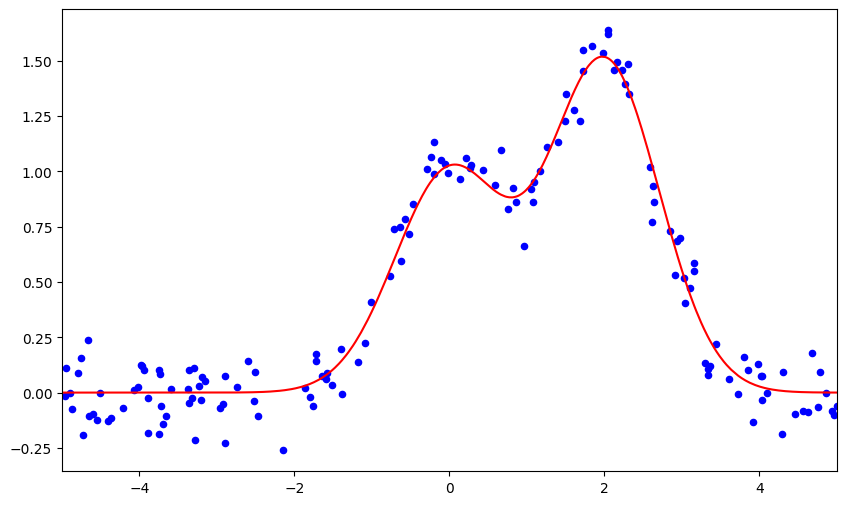

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])
plt.show()

##### Training Single Decision Tree without any Hyperparameter

In [39]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

Text(0.5, 1.0, 'Decision tree, MSE = 20.44')

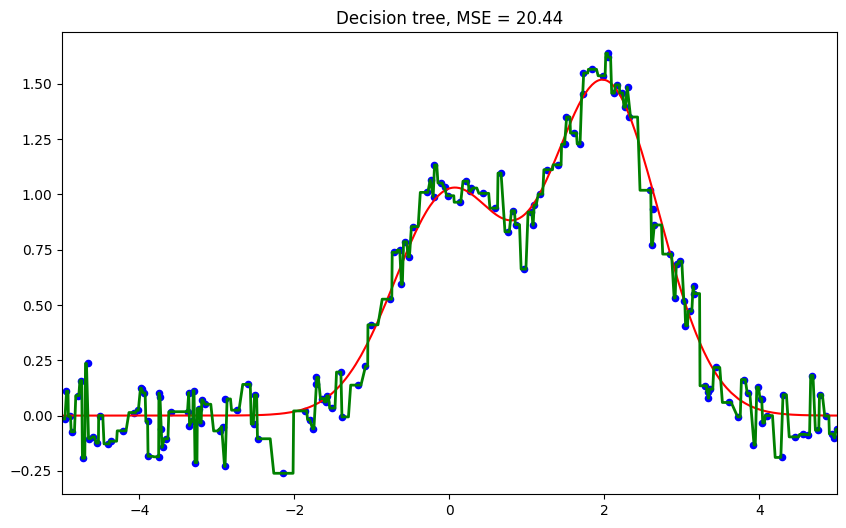

In [41]:
d_predict = dtree.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))

##### In above graph, Overfitting is happening i.e., Green Curve is not a True representation of Red curve

##### Applying Random Forest in above data

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

Text(0.5, 1.0, 'Random forest, MSE = 15.67')

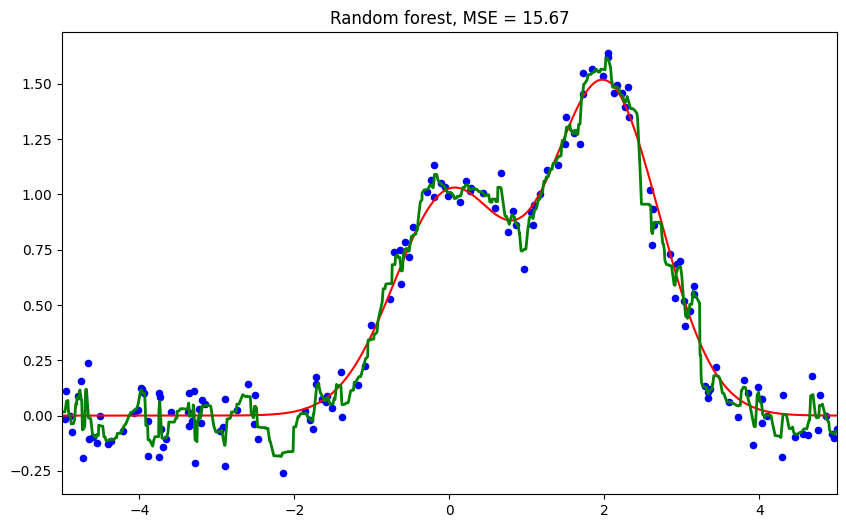

In [45]:
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))

##### In above graph, their are some point which RF is not mapping hence, it is better than above DT curve.
- We can also look MSE to Know RF is better